In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [8]:
diabetes_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here we found the null values in the dataset using the isnull() function and then took the sum of all the null values in the dataset.
The inference is that there is no missing values in the dataset which is not true, in this particular dataset all the missing values were given the 0 as the value which is not good for the authenticity of the dataset.
Hence we replace the 0 value with the NAN value in the dataset.

In [9]:
diabetes_df_copy=diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# **Data Visualization**

Plotting the data distribution plots before removing null values.

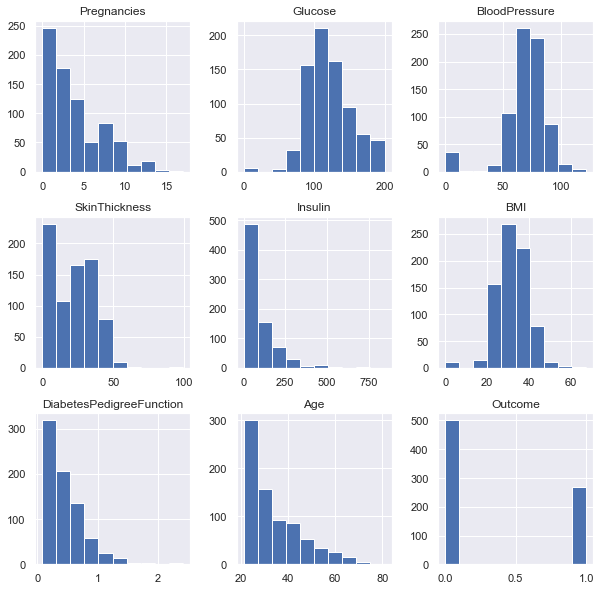

In [10]:
p=diabetes_df.hist(figsize=(10,10))


Now we will be impution the mean value of the column to each missing value of that particular column.

In [11]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(),inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(),inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(),inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(),inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(),inplace=True)

Plotting the distribution after removing the NaN values from the dataset

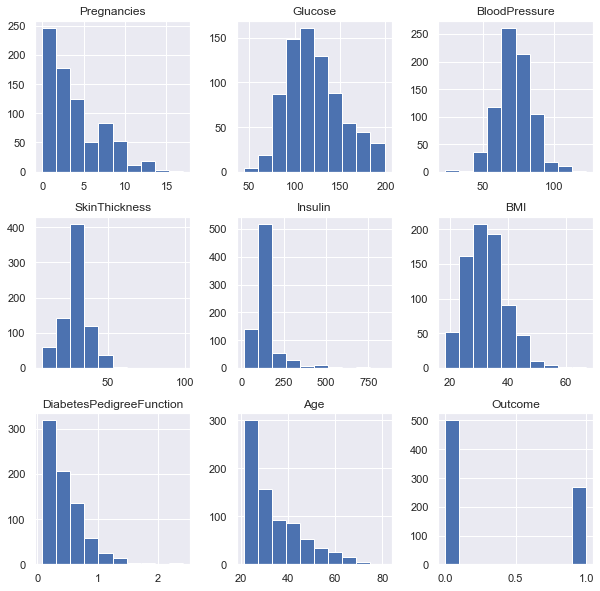

In [12]:
p2=diabetes_df_copy.hist(figsize=(10,10))

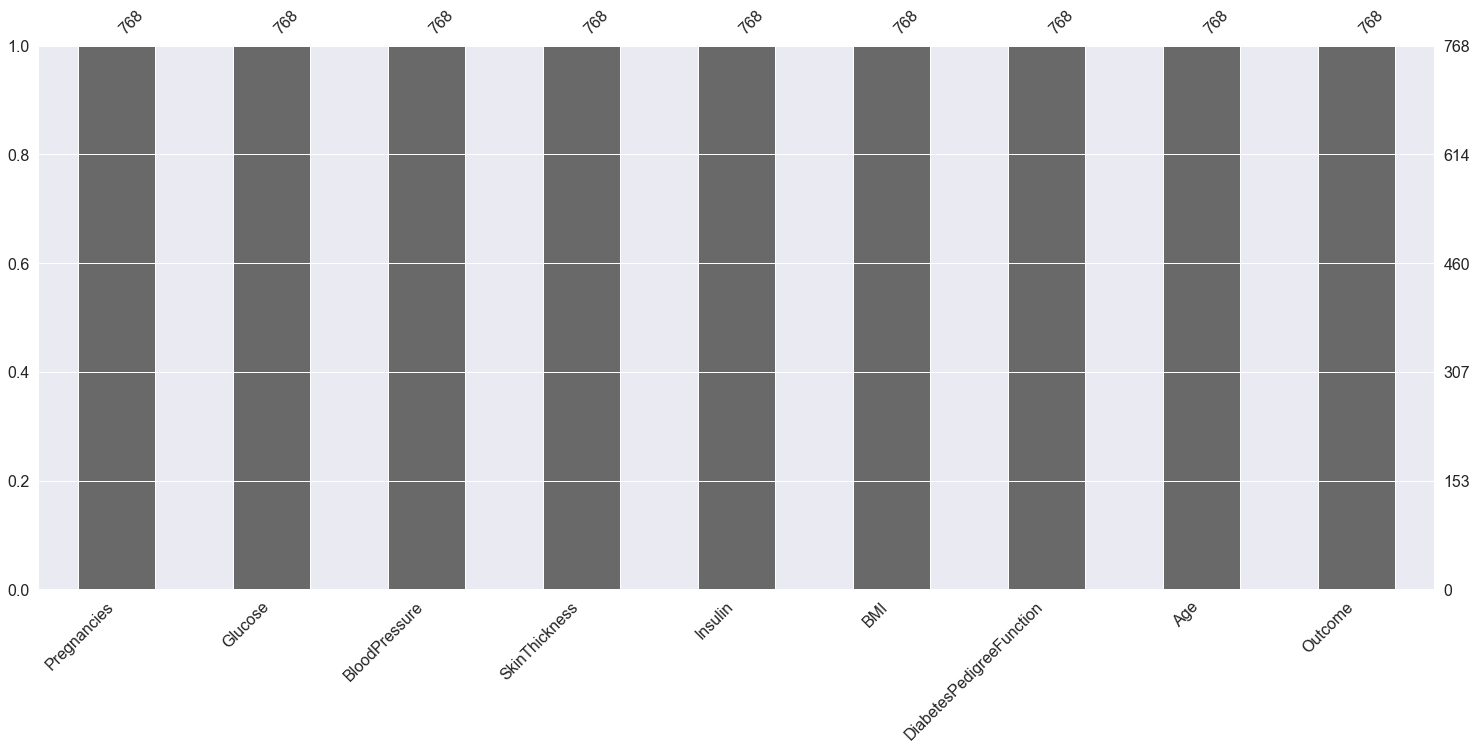

In [13]:
p3=msno.bar(diabetes_df)

0    500
1    268
Name: Outcome, dtype: int64


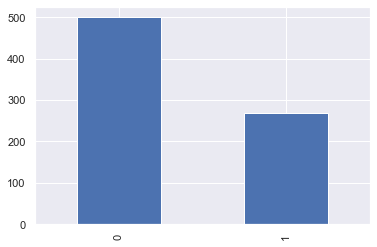

In [14]:
color_wheel={1: "#0392cf",2: "#7bc043"}
colors=diabetes_df["Outcome"].map(lambda x: color_wheel.get(x+1))
print(diabetes_df.Outcome.value_counts())
p4=diabetes_df.Outcome.value_counts().plot(kind="bar")

Inference:- Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half the patients who are non-diabetic.

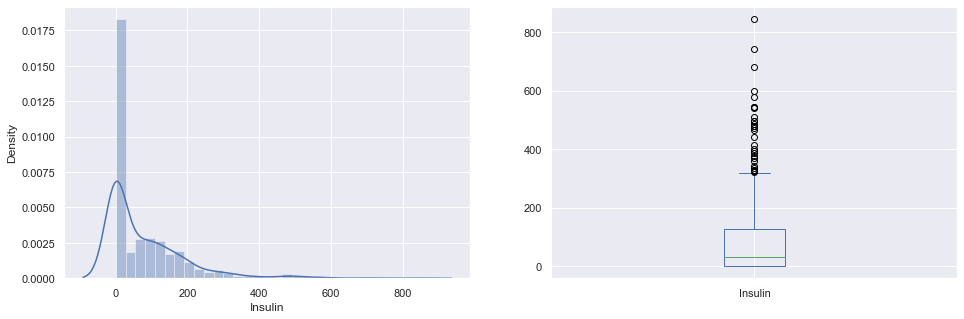

In [15]:
plot.subplot(121),sns.distplot(diabetes_df["Insulin"])
plot.subplot(122),diabetes_df['Insulin'].plot.box(figsize=(16,5))
plot.show()


# Correlation between all the features


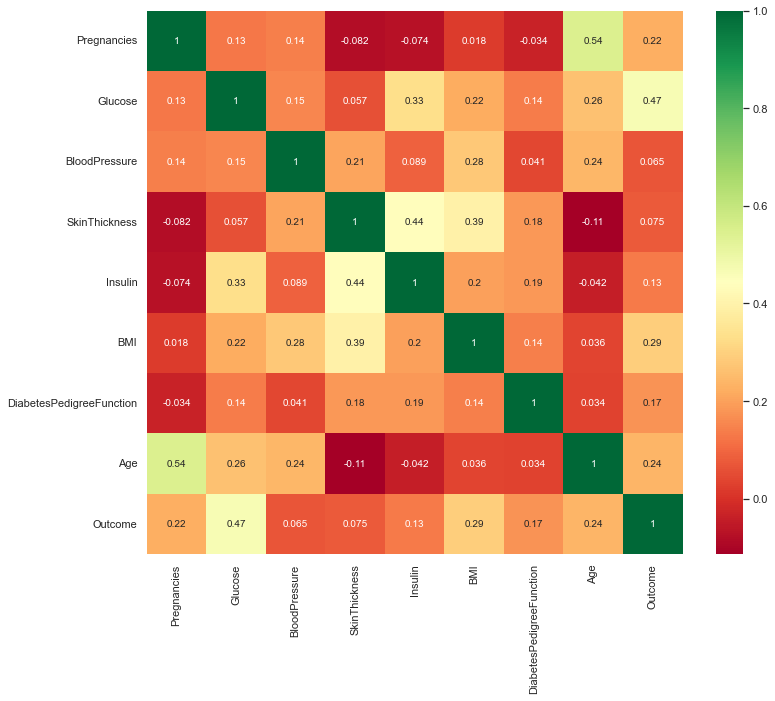

In [16]:
plot.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(),annot=True,cmap='RdYlGn')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

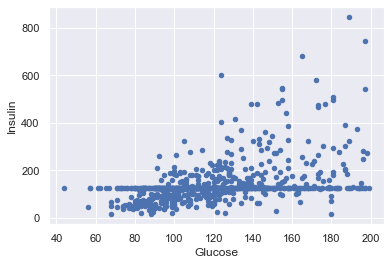

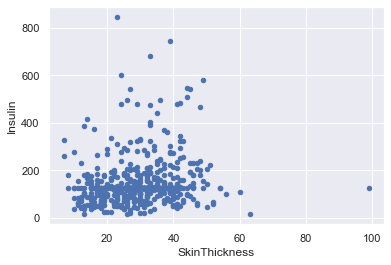

In [17]:

diabetes_df_copy.plot.scatter(x="Glucose",y="Insulin")
diabetes_df_copy.plot.scatter(x="SkinThickness",y="Insulin")

### Building Model

In [18]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
sc_x=StandardScaler()
X=pd.DataFrame(sc_x.fit_transform(diabetes_df_copy.drop(["Outcome"],axis=1),),columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


Now, This is how our dataset will look when it is scaled down, Now the values are on the same scale which will help our model to give better result.

In [20]:
X = diabetes_df_copy.drop('Outcome',axis=1)
Y = diabetes_df_copy['Outcome']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

# Building Random Forest model


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

Accuracy on training dataset

In [23]:
rfc_train=rfc.predict(X_train)
from sklearn import metrics
print("Accuracy Score=",format(metrics.accuracy_score(Y_train,rfc_train)))

Accuracy Score= 1.0


So from the above accuracy score we can see that on the training dataset orur model is over fitted.

Now testing our model on test dataset and checking the accuracy score.

In [24]:
predictions = rfc.predict(X_test)
print("Accuracy score=",format(metrics.accuracy_score(Y_test,predictions)))

Accuracy score= 0.7598425196850394


### Confusion matrix (Random Forest Model)

In [25]:
print(confusion_matrix(Y_test,predictions))

[[133  29]
 [ 32  60]]


### Classification Report

In [26]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       162
           1       0.67      0.65      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



# Building Decision Tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier


In [28]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

Let's check the Accuracy on our train datasset

In [29]:
Dtree_train = Dtree.predict(X_train)
from sklearn import metrics
print("Accuracy Score=",format(metrics.accuracy_score(Y_train,Dtree_train)))

Accuracy Score= 1.0


Now we can see that our model is overfitted with the train dataset.

Now let's check the Accuracy score of the model on the test dataset.

In [30]:
D_predictions = Dtree.predict(X_test)
print("Accuracy score=",format(metrics.accuracy_score(Y_test,D_predictions)))

Accuracy score= 0.7283464566929134


### Confusion matrix (Decision tree model)

In [31]:
print(confusion_matrix(Y_test,D_predictions))

[[120  42]
 [ 27  65]]


### Classification Report

In [32]:
print(classification_report(Y_test,D_predictions))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       162
           1       0.61      0.71      0.65        92

    accuracy                           0.73       254
   macro avg       0.71      0.72      0.71       254
weighted avg       0.74      0.73      0.73       254



# XGBoost Classification model

In [33]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train,Y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Now we directly do the predictions on test dataset.

In [34]:
xgb_predictions = xgb_model.predict(X_test)

In [35]:
print("Accuracy score=",format(metrics.accuracy_score(Y_test,xgb_predictions)))

Accuracy score= 0.7283464566929134


Now let us see the confusion matrix and the classification report.

In [36]:
print(confusion_matrix(Y_test,xgb_predictions))

[[128  34]
 [ 35  57]]


In [37]:
print(classification_report(Y_test,xgb_predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       162
           1       0.63      0.62      0.62        92

    accuracy                           0.73       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.73      0.73      0.73       254



From the above model building, we can draw the conclusion that the Random Forest Classification model gives the best predictions than compared to other models, with the Accuracy score of 0.76,which is 76% accurate.So the Random Forest Model gives the right predictions.

Now let us try to improve the Accuracy of the Random Forest Classification model by Hyper parameter tunning.

In [38]:
param_grid = {
    'n_estimators': [25, 50, 100, 150,200,250],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Now let’s use RandomizedSearchCV to obtain the best parameters for the model.

In [39]:
from sklearn.model_selection import RandomizedSearchCV
model_rand = RandomizedSearchCV(RandomForestClassifier(),param_grid)
model_rand.fit(X_train,Y_train)
print(model_rand.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=6,
                       n_estimators=250)


Now we have got parameters that gives the best predictions, so we will build the model with this parameters. 

In [40]:
rfc_best = RandomForestClassifier(max_depth=6, max_leaf_nodes=6,n_estimators=150)

In [41]:
rfc_best.fit(X_train,Y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=6, n_estimators=150)

Now let us make the predictions and get the accuracy score of the new improved model.

In [42]:
predictions_new = rfc_best.predict(X_test)
print("Accuracy score=",format(metrics.accuracy_score(Y_test,predictions_new)))

Accuracy score= 0.7244094488188977


### Confusion metrix and classification report

In [43]:
print(confusion_matrix(Y_test,predictions_new))

[[137  25]
 [ 45  47]]


In [44]:
print(classification_report(Y_test,predictions_new))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       162
           1       0.65      0.51      0.57        92

    accuracy                           0.72       254
   macro avg       0.70      0.68      0.68       254
weighted avg       0.72      0.72      0.72       254



After Hyper parameter tunning of the Random Forest Classification model, still the Accuracy score is 0.76 i.e 76% accurate, but we can see that the confusion metrix and the Classification report has been improved.

# Feature Importance

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [45]:
rfc_best.feature_importances_

array([0.04628606, 0.37625778, 0.02325302, 0.05430198, 0.08220894,
       0.17150756, 0.08686239, 0.15932227])

### Plotting feature importances

<AxesSubplot:>

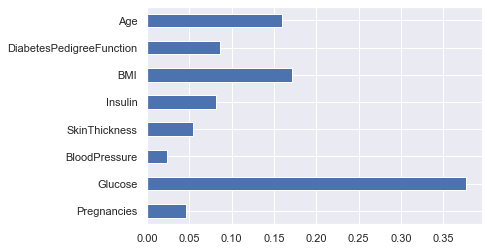

In [46]:
(pd.Series(rfc_best.feature_importances_,index=X.columns).plot(kind="barh"))

Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

## Saving the model-Random Forest Model.

In [47]:
import pickle

In [48]:
filename = 'diabetes_model.sav'
pickle.dump(rfc,open(filename,'wb'))

In [49]:
loaded_model = pickle.load(open('diabetes_model.sav','rb'))

In [50]:
loaded_model.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [51]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


 we can take any random set of features from both the head and tail of the data to test that if our model is good enough to give the right prediction.

In [53]:
rfc.predict([[1,	89,	66,	23,	94,	28.1,	0.167,	21]])

array([0], dtype=int64)

The above is the result of #3 patient.

In [54]:
rfc.predict([[5,	121,	72,	23,	112,	26.2,	0.245,	30]])

array([0], dtype=int64)

The above is the result of #765 patient.

# Conclusion

After using all these patient records, we are able to build a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.